In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

=== IRIS FLOWER CLASSIFICATION PROJECT ===

Dataset shape: (150, 5)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5

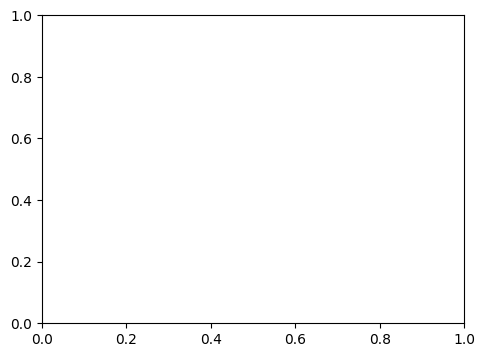

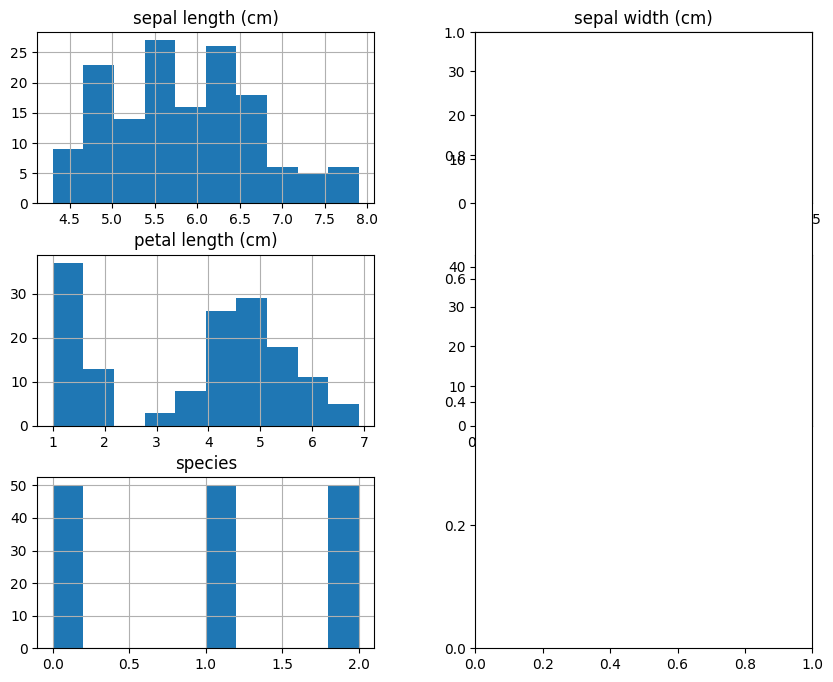

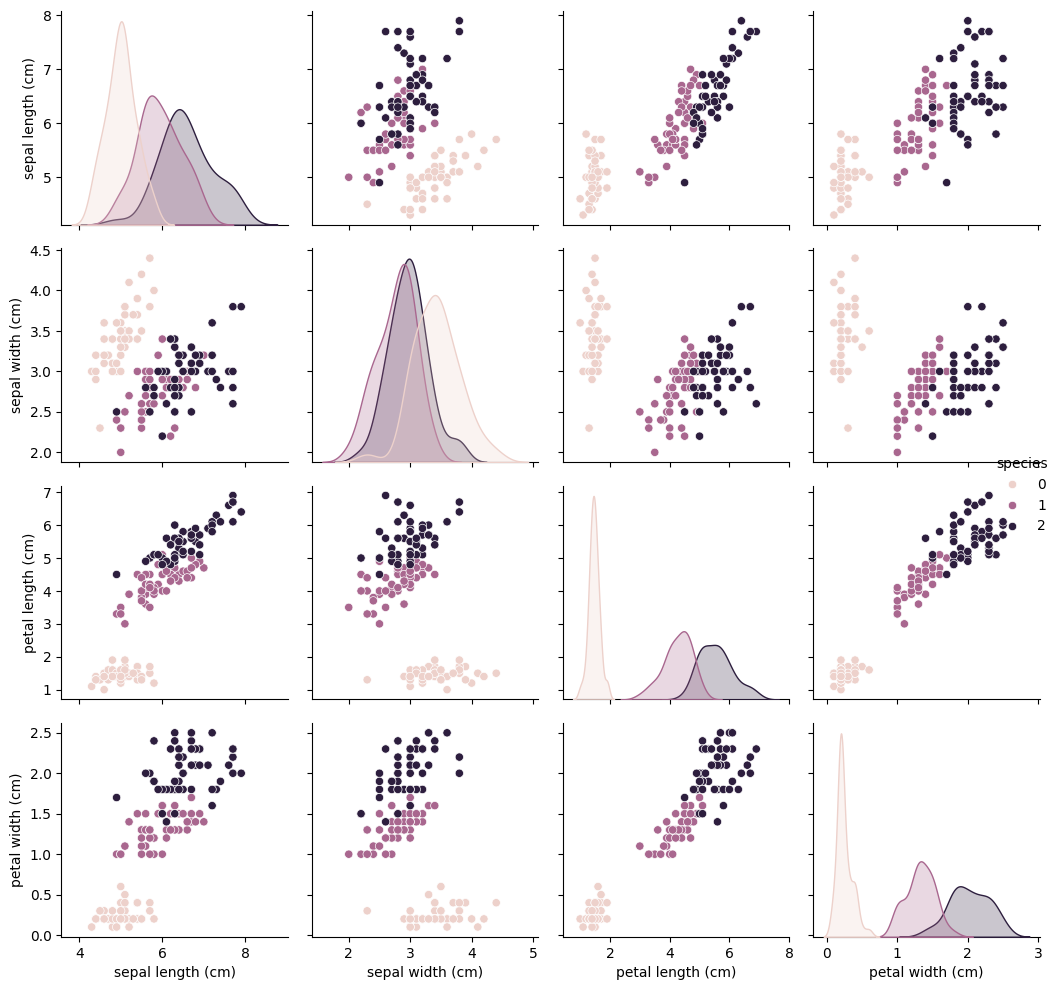

In [6]:
print("=== IRIS FLOWER CLASSIFICATION PROJECT ===\n")
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset description:")
print(df.describe())

# Visualize data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.hist(figsize=(10, 8))
plt.subplot(1, 2, 2)
sns.pairplot(df, hue='species')
plt.tight_layout()
plt.savefig('iris_visualization.png')
plt.show()

In [7]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (120, 4)
Test set: (30, 4)


In [8]:
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)
print("\nModel trained successfully!")



Model trained successfully!



Model Accuracy: 96.67%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



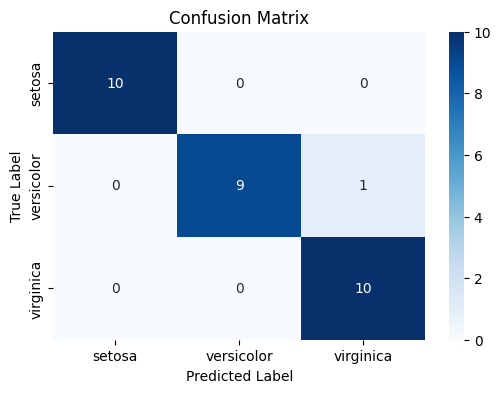

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')
plt.show()

In [10]:
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example measurements
prediction = model.predict(new_flower)
prediction_proba = model.predict_proba(new_flower)

print(f"\nNew flower measurements: {new_flower[0]}")
print(f"Predicted species: {iris.target_names[prediction[0]]}")
print(f"Prediction probabilities: {dict(zip(iris.target_names, prediction_proba[0]))}")

# Save the model
joblib.dump(model, 'iris_model.pkl')
print("\nModel saved as 'iris_model.pkl'")

print("\n=== PROJECT COMPLETE! Check saved files: iris_visualization.png, confusion_matrix.png, iris_model.pkl ===")


New flower measurements: [5.1 3.5 1.4 0.2]
Predicted species: setosa
Prediction probabilities: {np.str_('setosa'): np.float64(0.9784002244066916), np.str_('versicolor'): np.float64(0.021599720508640532), np.str_('virginica'): np.float64(5.5084667753473866e-08)}

Model saved as 'iris_model.pkl'

=== PROJECT COMPLETE! Check saved files: iris_visualization.png, confusion_matrix.png, iris_model.pkl ===


c:\Users\mohansai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\mohansai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
